## Task 5: Credit Card Fraud Detection(Random Forest Model and XGBoost Model)

## 1. Install and Import Libraries

In [2]:
pip install xgboost



   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 217.9 kB/s eta 0:11:29
   ---------------------------------------- 0.0/150.0 MB 262.6 kB/s eta 0:09:32
   ---------------------------------------- 0.1/150.0 MB 416.7 kB/s eta 0:06:00
   ---------------------------------------- 0.1/150.0 MB 476.3 kB/s eta 0:05:15
   ---------------------------------------- 0.1/150.0 MB 476.3 kB/s eta 0:05:15
   ---------------------------------------- 0.1/150.0 MB 476.3 kB/s eta 0:05:15
   ---------------------------------------- 0.1/150.0 MB 476.3 kB/s eta 0:05:15
   ---------------------------------------- 0.1/150.0 MB 476.3 kB/s eta 0:05:15
   ---------------------------------------- 0.1/150.0 MB 248.7 kB/s eta 0:10:03
   ---------------------------------------- 0.2/150.0 MB 295.6 kB/s eta 0:08:27
   ---------------------------------------- 0.2/150.0 MB 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline
sns.set(style="whitegrid")

## 2. Load and Inspect the Dataset

In [19]:
# Load dataset
credit_card_data = pd.read_csv('creditcard.csv')

In [20]:
#data inspection
print("\nFirst 5 rows ",credit_card_data.head())


First 5 rows     Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26      

In [21]:
print("\nLast 5 rows  \n", credit_card_data.tail())


Last 5 rows  
             Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.50

In [6]:
print("\nDataset information summary  \n")
credit_card_data.info()


Dataset information summary  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 n

In [7]:
print("\n.Dataset Descriptive Statistics:\n",credit_card_data.describe())


.Dataset Descriptive Statistics:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    

In [ ]:
print("\n.Dataset Descriptive Statistics:\n",credit_card_data.describe())


.Dataset Shape(rows,columns):
 (284807, 31)


In [ ]:
print("Dataset Columns:\n", credit_card_data.columns)

Dataset Columns:
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


## 3. Plot KDE Plot (Amount vs Class)

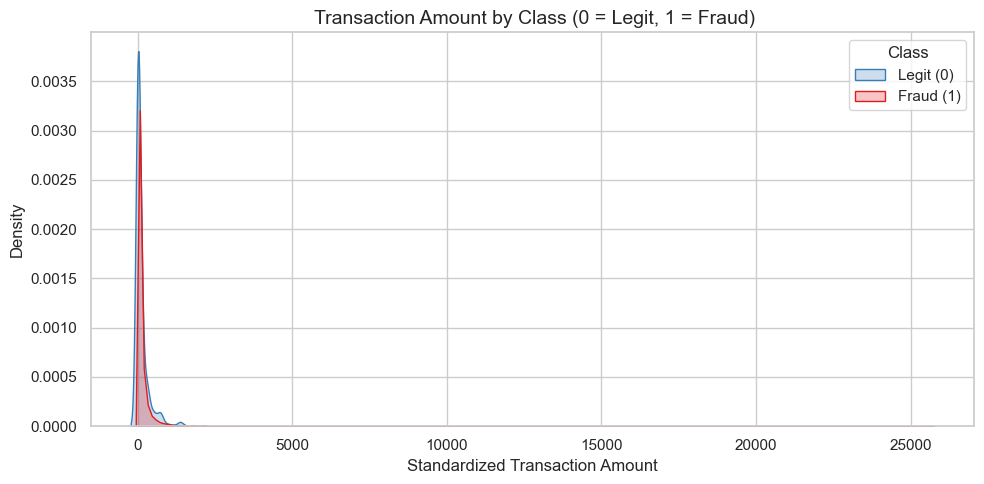

In [ ]:
#  a KDE (Density) plot.
plt.figure(figsize=(10, 5))
sns.kdeplot(data=credit_card_data, x='Amount', hue='Class', fill=True, common_norm=False, palette='Set1')
plt.title(' Transaction Amount by Class (0 = Legit, 1 = Fraud)', fontsize=14)
plt.xlabel('Standardized Transaction Amount', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Class', labels=['Legit (0)', 'Fraud (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Dimensionality Reduction with PCA

C:\Users\rupas\AppData\Local\Temp\ipykernel_16172\3663828809.py:29: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  plt.tight_layout()
c:\Users\rupas\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


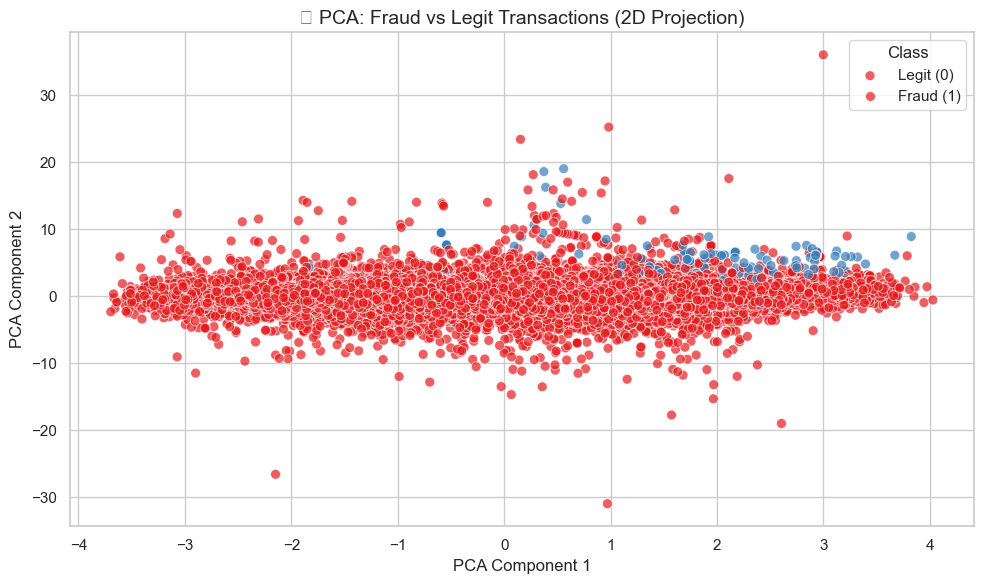

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'credit_card_data' is your DataFrame, and you're using all columns except 'Class'
features = credit_card_data.drop(columns=['Class', 'Amount'])  # Drop 'Class' and any irrelevant columns

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA to reduce the features to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA components and the 'Class' column
pca_df = pd.DataFrame(data=pca_components, columns=['PCA_1', 'PCA_2'])
pca_df['Class'] = credit_card_data['Class']

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Class', palette='Set1', data=pca_df, alpha=0.7, s=50)
plt.title('🧩 PCA: Fraud vs Legit Transactions (2D Projection)', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Class', labels=['Legit (0)', 'Fraud (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()


## 5. Preprocessing

In [22]:
# Drop rows with missing target values
credit_card_data = credit_card_data[credit_card_data['Class'].notna()]

In [23]:
# Scale 'Amount' and drop unnecessary columns
credit_card_data['std_Amount'] = StandardScaler().fit_transform(
    credit_card_data['Amount'].values.reshape(-1, 1)
)
credit_card_data.drop(['Time', 'Amount'], axis=1, inplace=True)

## 6. Class Imbalance Analysis

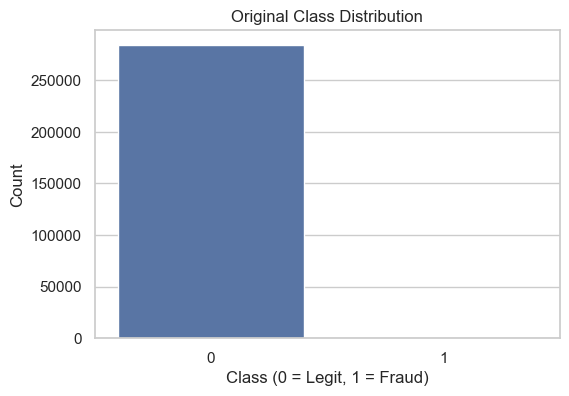

In [24]:
# Class distribution before sampling
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=credit_card_data)
plt.title("Original Class Distribution")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

## 7. Handle Imbalance — Undersampling

In [25]:
#Handle Imbalance - Undersampling

X = credit_card_data.drop("Class", axis=1)
y = credit_card_data["Class"]

undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_under, y_under = undersample.fit_resample(X, y)

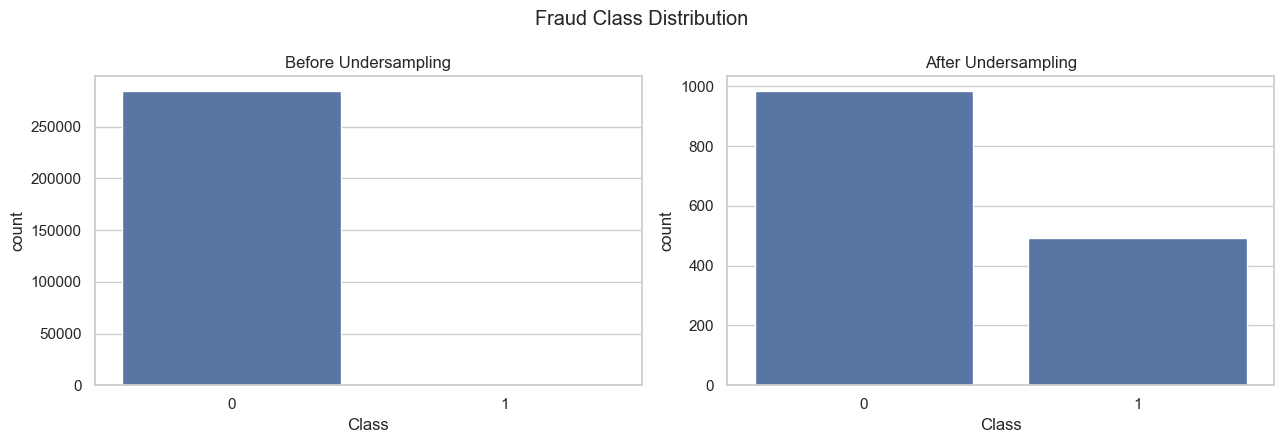

In [26]:

# Visualize before and after
fig, axs = plt.subplots(ncols=2, figsize=(13, 4.5))
sns.countplot(x="Class", data=credit_card_data, ax=axs[0])
sns.countplot(x=y_under, ax=axs[1])
axs[0].set_title("Before Undersampling")
axs[1].set_title("After Undersampling")
fig.suptitle("Fraud Class Distribution")
plt.tight_layout()
plt.show()

## Training model

In [27]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_under, y_under, test_size=0.2, stratify=y_under, random_state=42
)

## 8. Train Random Forest Model


In [ ]:
#Train & Evaluate Random Forest
print("\n=== 🌲 Random Forest Model ===")
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))


=== 🌲 Random Forest Model ===
Accuracy : 0.9594594594594594
Precision: 0.9887640449438202
Recall   : 0.8888888888888888
F1 Score : 0.9361702127659575


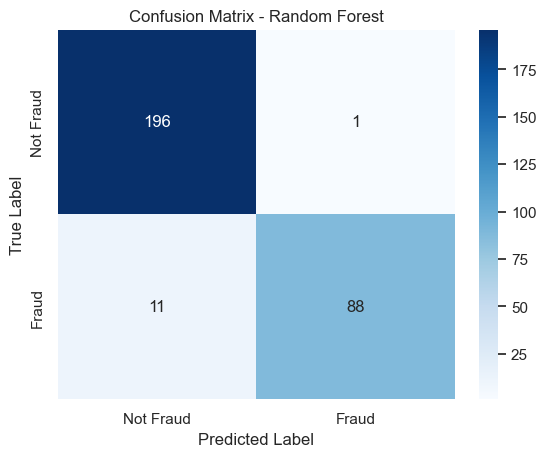

In [ ]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(pd.DataFrame(cm_rf, index=["Not Fraud", "Fraud"], columns=["Not Fraud", "Fraud"]),
            annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

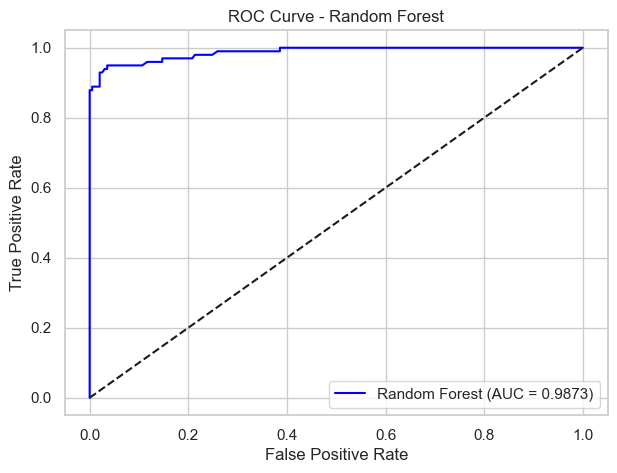

In [ ]:
# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(7, 5))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.4f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## 9. Train XGBoost Model

In [15]:
# Train & Evaluate XGBoost
print("\n=== XGBoost Model ===")
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1 Score :", f1_score(y_test, y_pred_xgb))


=== XGBoost Model ===


c:\Users\rupas\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:13:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy : 0.9594594594594594
Precision: 0.978021978021978
Recall   : 0.898989898989899
F1 Score : 0.9368421052631579


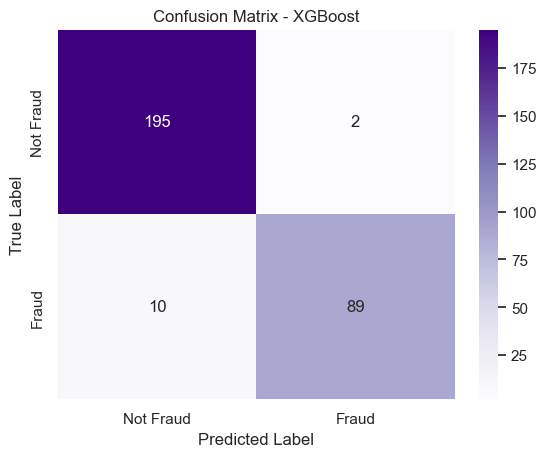

In [16]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(pd.DataFrame(cm_xgb, index=["Not Fraud", "Fraud"], columns=["Not Fraud", "Fraud"]),
            annot=True, fmt='g', cmap='Purples')
plt.title("Confusion Matrix - XGBoost")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

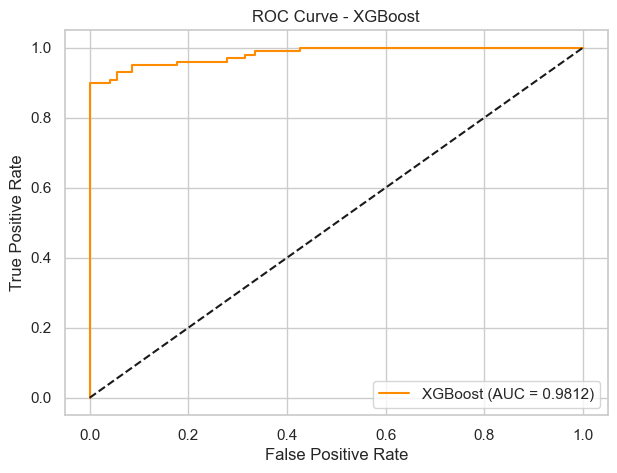

In [17]:
# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(7, 5))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.4f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()